In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from tqdm import tqdm
import os
from PIL import Image
from matplotlib.colors import LinearSegmentedColormap

In [2]:
def getNeighborsTemperature(grid, point, T_inf,B):
    neighbors = []
    
    rows = len(grid)
    cols = len(grid[0])

    for i in range(-1, 2):
        for j in range(-1, 2):
            try:
                if abs(i) != abs(j):
                    neighbor_temp = grid[point[0] + i][point[1] + j]
                    neighbors.append(neighbor_temp)
            except IndexError:
                ###...Edge or corner point...###
                # Upper edge point:
                if point[0] == 0:
                    # upper left corner point
                    if point[1] == 0:
                        if i==-1 and j==0:
                            boundary_temp = grid[point[0] + 1][point[1]] + B*(T_inf - grid[point[0]][point[1]]) # i!=0
                            neighbors.append(boundary_temp)
                        elif i==0 and j==1:
                            boundary_temp = grid[point[0]][point[1]-1] + B*(T_inf-grid[point[0]][point[1]]) # j!=0
                            neighbors.append(boundary_temp)
                    # upper right corner point
                    elif point[1] == cols - 1:
                        if i==1 and j==0:
                            boundary_temp = grid[point[0]-1][point[1]] + B*(T_inf-grid[point[0]][point[1]]) # i!=0
                            neighbors.append(boundary_temp)
                        elif i==0 and j==1:
                            boundary_temp = grid[point[0]][point[1]-1] + B*(T_inf-grid[point[0]][point[1]]) # j!=0
                            neighbors.append(boundary_temp)
                    # upper edge
                    else:
                        boundary_temp = grid[point[0]][point[1]-1] + B*(T_inf-grid[point[0]][point[1]])
                        neighbors.append(boundary_temp)
                
                # lower edge point
                elif point[0] == rows - 1:
                    # Lower left corner
                    if point[1] == 0:
                        if i==-1 and j==0:
                            boundary_temp = grid[point[0]+1][point[1]] + B*(T_inf-grid[point[0]][point[1]]) # i!=0
                            neighbors.append(boundary_temp)
                        elif i==0 and j==-1:
                            boundary_temp = grid[point[0]][point[1]+1] + B*(T_inf-grid[point[0]][point[1]]) # j!=0
                            neighbors.append(boundary_temp)
                    
                    # lower right corner
                    elif point[1] == cols - 1:
                        if i==1 and j==0:
                            boundary_temp = grid[point[0]-1][point[1]] + B*(T_inf-grid[point[0]][point[1]]) # i!=0
                            neighbors.append(boundary_temp)
                        elif i==0 and j==-1:
                            boundary_temp = grid[point[0]][point[1]+1] + B*(T_inf-grid[point[0]][point[1]]) # j!=0
                            neighbors.append(boundary_temp)
                    
                    # lower edge
                    else:
                        boundary_temp = grid[point[0]][point[1]+1] + B*(T_inf-grid[point[0]][point[1]]) # j!=0
                        neighbors.append(boundary_temp)
                
                # left edge
                elif point[1] == 0:
                    boundary_temp = grid[point[0]+1][point[1]] + B*(T_inf-grid[point[0]][point[1]]) # i!=0
                    neighbors.append(boundary_temp)
                
                # right edge
                elif point[1] == cols - 1:
                    boundary_temp = grid[point[0]-1][point[1]] + B*(T_inf-grid[point[0]][point[1]]) # i!=0
                    neighbors.append(boundary_temp)

    return neighbors

def calculateHeat(cellTemp, neighborTemps, gamma):
    cellTemp = cellTemp + gamma*((neighborTemps[0] -2*cellTemp + neighborTemps[-1]) + (neighborTemps[1] -2*cellTemp + neighborTemps[-2]))
    #print(cellTemp)
    return np.float64(cellTemp)

def heatTransfer(grid, boundaryTemp, B_i):
    for i in range(0,len(grid)):
        for j in range(0,len(grid)):
            neighbors = getNeighborsTemperature(grid[:,:,0], (i,j), boundaryTemp, B_i)
            grid[:,:,0][i][j] = calculateHeat(grid[:,:,0][i][j], neighbors, grid[:,:,1][i][j])
    return grid

def calculateAverageTemperatureWithinCircle(grid, center, radius):
    # Extract the temperature values from the grid
    temperatures = grid[:, :, 0]

    # Create a mask for the circle
    x, y = np.indices(temperatures.shape)
    mask = ((x - center[0])**2 + (y - center[1])**2) <= radius**2

    # Calculate the average temperature within the circle
    average_temperature = np.mean(temperatures[mask])
    
    return average_temperature

def makeGif(frames,name,timeStep,minTemp,maxTemp, frames_name):
        counter=0
        images = []
        for i in tqdm(range(0,len(frames))):
                plt.figure()
                plt.title(f"Temperature at t = {counter*timeStep:.3f} unit time")
                plt.xlabel("x")
                plt.ylabel("y")
                plt.pcolormesh(frames[i], cmap = "inferno" , vmin = minTemp, vmax = maxTemp)
                plt.colorbar()
                plt.savefig("frames/" + frames_name + "/"+str(counter)+ '_'+ frames_name + ".png")
                images.append(imageio.imread("frames/" + frames_name + "/"+str(counter)+ '_'+ frames_name + ".png"))
                counter += 1
                plt.close()
                
        imageio.mimsave("gifs/"+name+ ".gif", images)

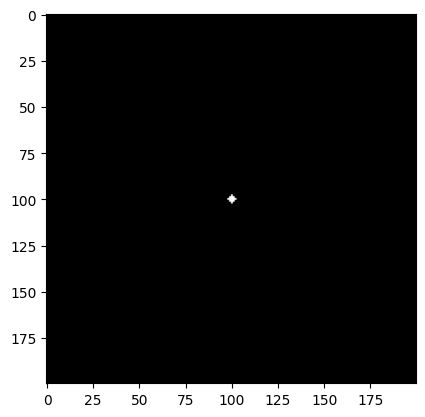

100%|██████████| 30000/30000 [2:37:09<00:00,  3.18it/s]  


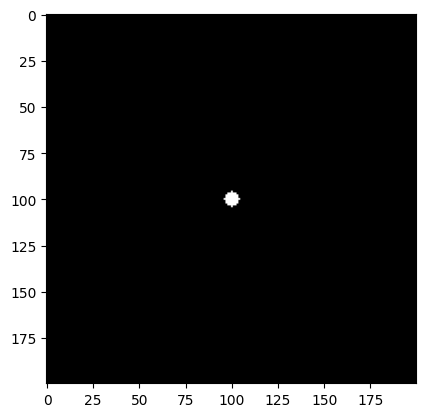

100%|██████████| 30000/30000 [2:41:14<00:00,  3.10it/s]  


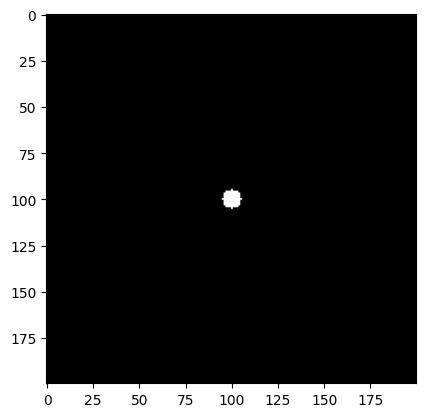

100%|██████████| 30000/30000 [2:44:13<00:00,  3.04it/s]  


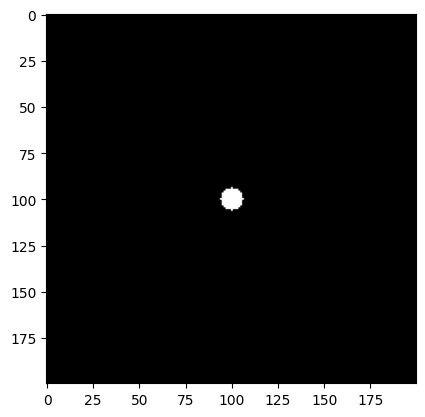

100%|██████████| 30000/30000 [2:45:36<00:00,  3.02it/s]  


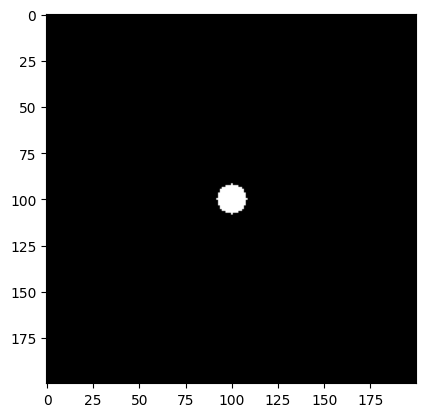

100%|██████████| 30000/30000 [2:50:09<00:00,  2.94it/s]  


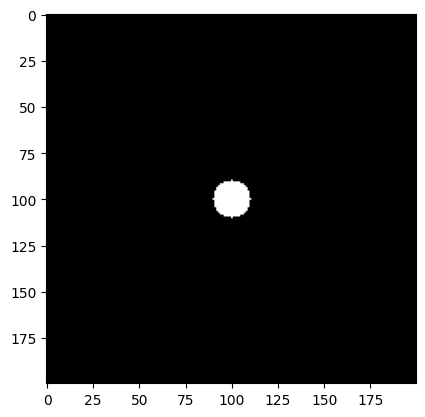

100%|██████████| 30000/30000 [2:53:25<00:00,  2.88it/s]  


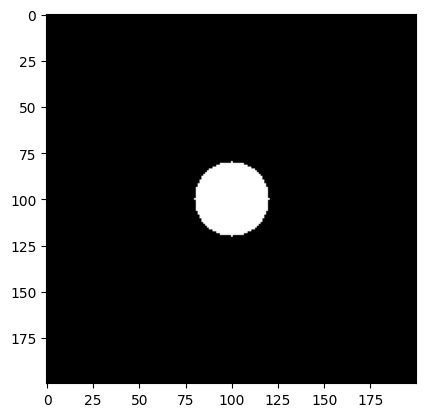

100%|██████████| 30000/30000 [2:58:48<00:00,  2.80it/s]  


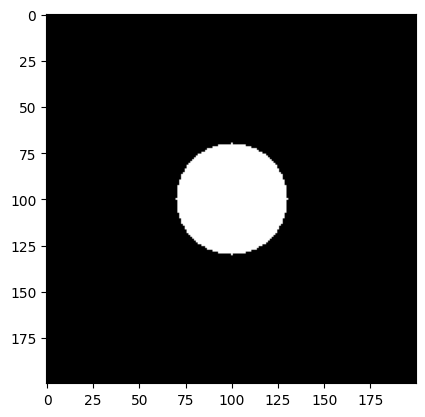

100%|██████████| 30000/30000 [3:03:47<00:00,  2.72it/s]  


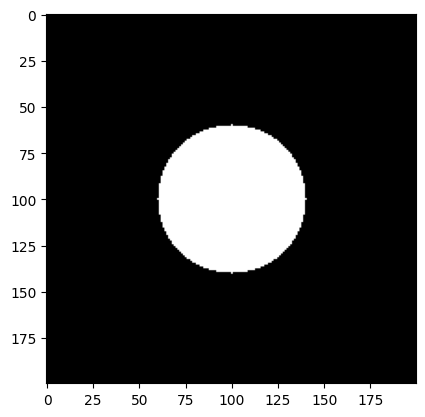

100%|██████████| 30000/30000 [3:10:21<00:00,  2.63it/s]  


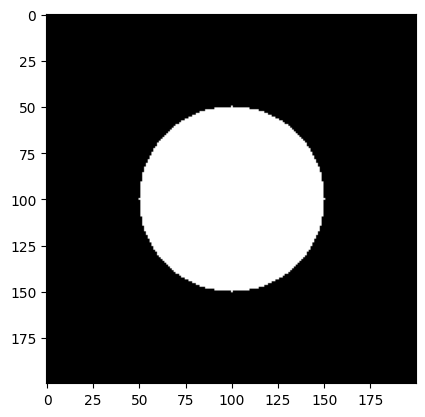

100%|██████████| 30000/30000 [3:17:46<00:00,  2.53it/s]  


In [57]:
# Array to save data
temp_array = [[],[],[],[],[],[],[],[],[],[]]
time = []
frames_array = []
radius_array = [1,2,2.5,3,4,5,10,15,20,25] # 0.1 micrometer for dx
diameter_name_array = []
frames_name = ["0.4micro","0.8micro","1micro","1.2micro","1.6micro","2micro","4micro","6micro","8micro","10micro"]
gif_name = ["0.4micro","0.8micro","1micro","1.2micro","1.6micro","2micro","4micro","6micro","8micro","10micro"]


###.........Heat simulation diameter scan.........###
# Data
resolution = 200
startingTemperature = 103.15 # Round about -170C°
gamma = 0.245
timeStep = 1.96*10**(-4) 
boundaryTemp = 103.15
B_i = 0.18
number_of_steps = 30000

#Add heat
center= (100, 100)
value_to_add = 492.2
radius_of_interest = 2

specific_point = timeStep*number_of_steps
step_size = timeStep
time_step_array =  np.arange(0, specific_point, step_size)
time.append(time_step_array)
        

for i in range(len(radius_array)):
        
        radius_heat = radius_array[i]*2
        
        x1 = np.full(resolution, startingTemperature)
        y1 = np.full(resolution, startingTemperature)

        x2 = np.full(resolution, gamma)
        y2 = np.full(resolution, gamma)

        gridX, gridY = np.meshgrid(x1,y1)
        gridX2, gridY2 = np.meshgrid(x2,y2)

        fullGridX = np.dstack([gridX,gridX2])
        fullGridY = np.dstack([gridY,gridY2])

        # create meshgrid coordinates
        x = np.arange(resolution)
        y = np.arange(resolution)
        # create meshgrid for the x,y coordinates
        X, Y = np.meshgrid(x, y)
        # Berechne den Abstand jedes Gitterpunkts zum Mittelpunkt
        distances = np.sqrt((X - center[0])**2 + (Y - center[1])**2)
        # Überprüfe, ob der Abstand kleiner oder gleich dem Radius ist
        mask = distances <= radius_heat
        # Aktualisiere die Werte im Gitter entsprechend der Maske
        fullGridX[:,:,0][mask] += value_to_add

        # Plot the created mask
        white_image = Image.new('L', (200, 200), 255)
        white_image = white_image * mask
        plt.imshow(white_image,cmap='gray')
        #plt.scatter(50,50, color = "red")
        plt.show()

        #Run simulation
        frames = [fullGridX[:,:,0].copy()]

        average_temperatures_in_circle = []
        for t in tqdm(range(0,number_of_steps)):
                # Calculate the average temperature within the circle and append to the list
                average_temp_in_circle = calculateAverageTemperatureWithinCircle(fullGridX, center, radius_of_interest)
                temp_array[i].append(average_temp_in_circle)
                
                # Calculate the heat
                fullGridX = heatTransfer(fullGridX.copy(),boundaryTemp, B_i)
                frames.append(fullGridX[:,:,0].copy())
        frames_array.append(frames)



In [ ]:
# Make file and store mean temperature values in it
file_path = 'Diameter_scan_array.txt'

np.savetxt(file_path,temp_array, delimiter=',', newline='\n', fmt='%f')

loaded_array= np.loadtxt(file_path, delimiter=',')

In [45]:
# Define the colors for the colormap: red (1, 0, 0), purple (0.5, 0, 0.5), blue (0, 0, 1)
colors = [(0.8, 0, 0), (0.7, 0.7, 0), (0, 0, 0.8)]
#colors = [(0, 0, 0.8), (0.5, 0, 0.5), (0.8, 0, 0)]

# Number of colors in the colormap
n_colors = 10

# Create the colormap
blue_yellow_red_cmap = LinearSegmentedColormap.from_list("red_purpel_blue", colors, N=n_colors)

# Create an array of colors from red to blue via purple
color_array = blue_yellow_red_cmap(np.linspace(0, 1, n_colors))

In [13]:
time = []
number_of_steps = 30000
timeStep = 1.96*10**(-4) 

specific_point = timeStep*number_of_steps
step_size = timeStep
time_step_array =  np.arange(0, specific_point, step_size)
time.append(time_step_array)

In [61]:
file_path = 'Diameter_scan_array.txt'
loaded_array= np.loadtxt(file_path, delimiter=',')

len(loaded_array[1])
specific_point = timeStep*(number_of_steps)
step_size = timeStep
time_step_array =  np.arange(0, specific_point, step_size)
time.append(time_step_array)


# Nano seconds
time_step_array = [element * 100 for element in time_step_array]
len(time_step_array)

30000

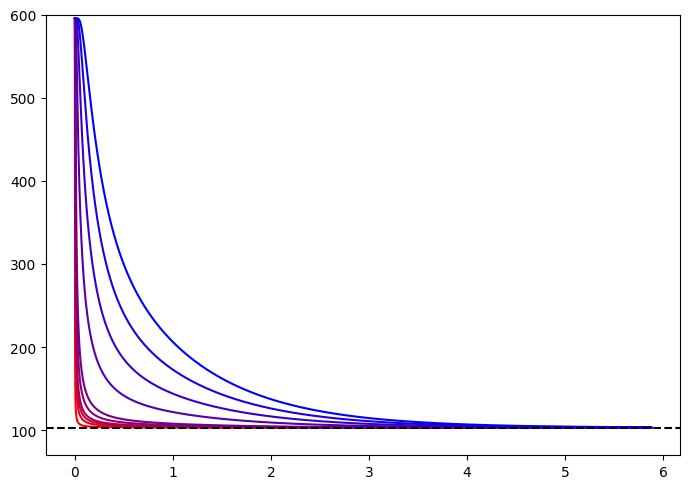

In [62]:
#Plot the Result
plt.figure(figsize=(7,5))
#plt.minorticks_on
#plt.xlabel(r'Time in x100 ns', fontsize="14")
#plt.ylabel(r"Temperature in K", fontsize="14")

for i in range(len(loaded_array)):
    plt.plot(time_step_array, loaded_array[i], color= color_array [i])
    #plt.legend(loc="upper right")

# Show line where the CDW Spots arge gone
plt.axhline(y=103.15, color='black', linestyle='--')
plt.ylim(70, 600)
#plt.xscale('symlog')
#plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

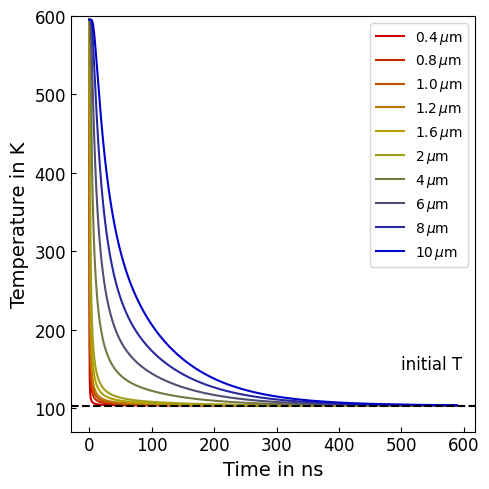

In [82]:
#Plot the Result
plt.figure(figsize=(5,5))
plt.minorticks_on
plt.xlabel(r'Time in ns', fontsize="14")
plt.ylabel(r"Temperature in K", fontsize="14")

# Diameter
label_arr = [r'$0.4 \, \mu$m', r'$0.8 \, \mu$m', r'$1.0 \, \mu$m', r'$1.2 \, \mu$m', r'$1.6 \, \mu$m', r'$2 \, \mu$m', r'$4 \, \mu$m', r'$6 \, \mu$m',  r'$8 \, \mu$m', r'$10 \, \mu$m']

for i in range(len(loaded_array)):
    plt.plot(time_step_array, loaded_array[i], color= color_array [i], label = label_arr[i] )
    plt.legend(loc="upper right")

# Show line where the CDW Spots arge gone
plt.axhline(y=103.15, color='black', linestyle='--')
plt.text(500, 150, 'initial T', color='black', backgroundcolor='white', fontsize = 12)

plt.ylim(70, 600)

#Set the ricks direction inwards
plt.tick_params(axis='both', which='major', direction='in')
plt.tick_params(axis='both', which='minor', direction='in')

plt.tick_params(axis='both', labelsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig(r'P:\Heat Transfer\Final_plots' + '/' + "Diameter_scan.pdf")
plt.show()

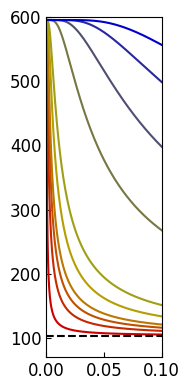

In [35]:
#Plot the Result
plt.figure(figsize=(2,4))
plt.minorticks_on
#plt.xlabel(r'Time in x100 ns', fontsize="14")
#plt.ylabel(r"Temperature in K", fontsize="14")

for i in range(len(loaded_array)):
    plt.plot(time_step_array, loaded_array[i], color= color_array [i])

# Show line where the CDW Spots arge gone
plt.axhline(y=103.15, color='black', linestyle='--', label='origin temperature')
plt.ylim(70, 600)
plt.xlim(0.0,0.1)
#plt.xscale('log')

#Set the ricks direction inwards
plt.tick_params(axis='both', which='major', direction='in')
plt.tick_params(axis='both', which='minor', direction='in')

plt.tick_params(axis='both', labelsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig(r'P:\Heat Transfer\Final_plots' + '/' + "Diameter_scan_zoom.pdf")
plt.show()

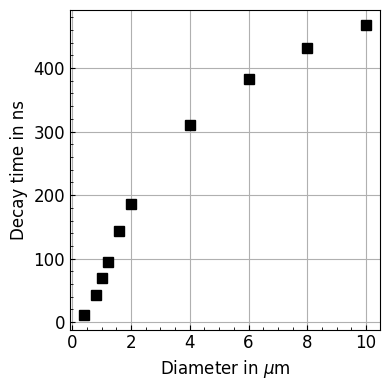

In [100]:
initial_temp = []
for i in range(len(loaded_array)):
    for j in range(len(loaded_array[i])):
        if loaded_array[i][j] <= 105:
            initial_temp.append(j)
            break
decay_time = []
for i in initial_temp:
    decay_time.append(i*timeStep*100)

decay_time

diameter_array = [0.4,0.8,1.0,1.2,1.6,2,4,6,8,10]


# Funktion für den Fit
def fit_func(x, a, b):
    return a * x + b


#Plot the Result
plt.figure(figsize=(4,4))
plt.minorticks_on()
plt.xlabel(r'Diameter in $\mu$m', fontsize="12")
plt.ylabel(r"Decay time in ns", fontsize="12")


plt.errorbar(diameter_array, decay_time, fmt= "s", markersize=7, linewidth=1, color="black")

#Set the ricks direction inwards
plt.tick_params(axis='both', which='major', direction='in')
plt.tick_params(axis='both', which='minor', direction='in')

#plt.xscale('log')
#plt.yscale('log')
plt.grid("on")

plt.tick_params(axis='both', labelsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig(r'P:\Heat Transfer\Final_plots' + '/' + "decay_time_diameter.pdf")
plt.show()


In [ ]:
#Make Gif, saves as "simulation.gif"
for i in range(frames_array):
    makeGif(frames_array[i],gif_name[i],timeStep,103.15,500, frames_name[i])

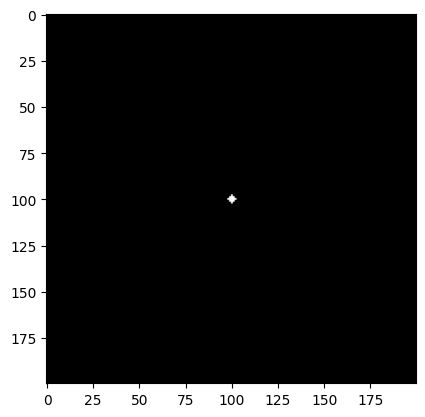

100%|██████████| 30000/30000 [2:26:46<00:00,  3.41it/s]  


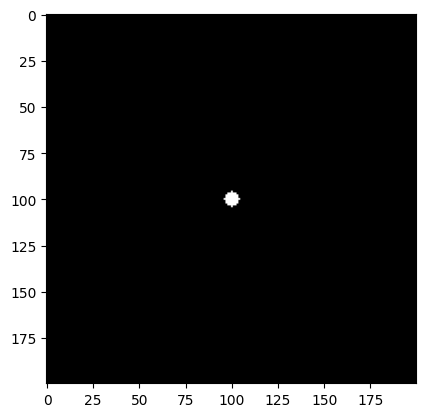

100%|██████████| 30000/30000 [2:25:41<00:00,  3.43it/s]  


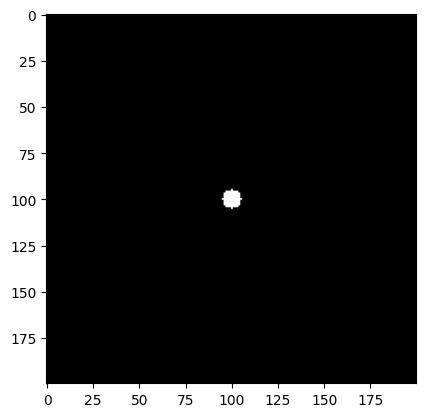

100%|██████████| 30000/30000 [2:27:40<00:00,  3.39it/s]  


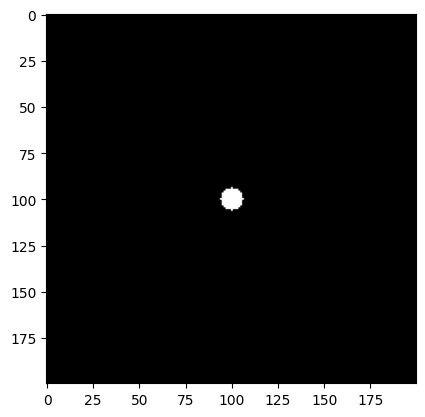

100%|██████████| 30000/30000 [2:31:03<00:00,  3.31it/s]  


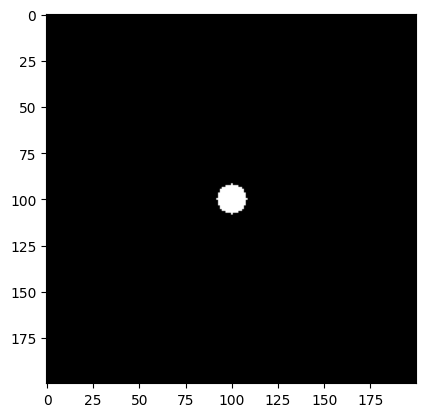

100%|██████████| 30000/30000 [2:39:23<00:00,  3.14it/s]  


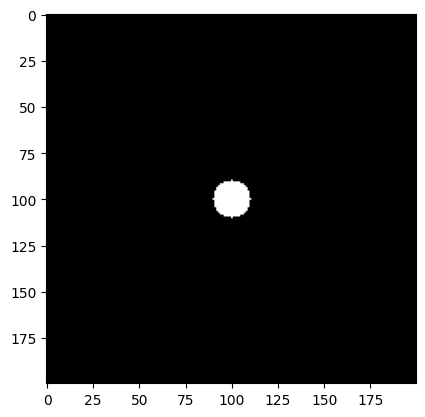

 48%|████▊     | 14405/30000 [1:20:51<1:30:32,  2.87it/s]

In [101]:
# Array to save data
temp_array = [[],[],[],[],[],[],[],[],[],[]]
time = []
frames_array = []
radius_array = [1,2,2.5,3,4,5,10,15,20,25] # 0.1 micrometer for dx
diameter_name_array = []
frames_name = ["0.4micro","0.8micro","1micro","1.2micro","1.6micro","2micro","4micro","6micro","8micro","10micro"]
gif_name = ["0.4micro","0.8micro","1micro","1.2micro","1.6micro","2micro","4micro","6micro","8micro","10micro"]


###.........Heat simulation diameter scan.........###
# Data
resolution = 200
startingTemperature = 103.15 # Round about -170C°
gamma = 0.245
timeStep = 1.96*10**(-4) 
boundaryTemp = 103.15
B_i = 0.18
number_of_steps = 30000

#Add heat
center= (100, 100)
value_to_add = 492.2
radius_of_interest = 2

specific_point = timeStep*number_of_steps
step_size = timeStep
time_step_array =  np.arange(0, specific_point, step_size)
time.append(time_step_array)
        

for i in range(len(radius_array)):
        
        radius_heat = radius_array[i]*2
        
        x1 = np.full(resolution, startingTemperature)
        y1 = np.full(resolution, startingTemperature)

        x2 = np.full(resolution, gamma)
        y2 = np.full(resolution, gamma)

        gridX, gridY = np.meshgrid(x1,y1)
        gridX2, gridY2 = np.meshgrid(x2,y2)

        fullGridX = np.dstack([gridX,gridX2])
        fullGridY = np.dstack([gridY,gridY2])

        # create meshgrid coordinates
        x = np.arange(resolution)
        y = np.arange(resolution)
        # create meshgrid for the x,y coordinates
        X, Y = np.meshgrid(x, y)
        # Berechne den Abstand jedes Gitterpunkts zum Mittelpunkt
        distances = np.sqrt((X - center[0])**2 + (Y - center[1])**2)
        # Überprüfe, ob der Abstand kleiner oder gleich dem Radius ist
        mask = distances <= radius_heat
        # Aktualisiere die Werte im Gitter entsprechend der Maske
        fullGridX[:,:,0][mask] += value_to_add

        # Plot the created mask
        white_image = Image.new('L', (200, 200), 255)
        white_image = white_image * mask
        plt.imshow(white_image,cmap='gray')
        #plt.scatter(50,50, color = "red")
        plt.show()

        #Run simulation
        frames = [fullGridX[:,:,0].copy()]

        average_temperatures_in_circle = []
        for t in tqdm(range(0,number_of_steps)):
                # Calculate the average temperature within the circle and append to the list
                average_temp_in_circle = calculateAverageTemperatureWithinCircle(fullGridX, center, radius_array[i])
                temp_array[i].append(average_temp_in_circle)
                
                # Calculate the heat
                fullGridX = heatTransfer(fullGridX.copy(),boundaryTemp, B_i)
                frames.append(fullGridX[:,:,0].copy())
        frames_array.append(frames)

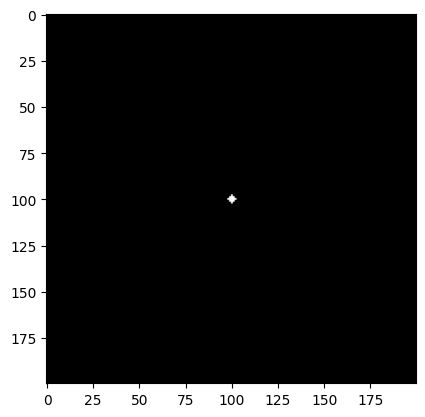

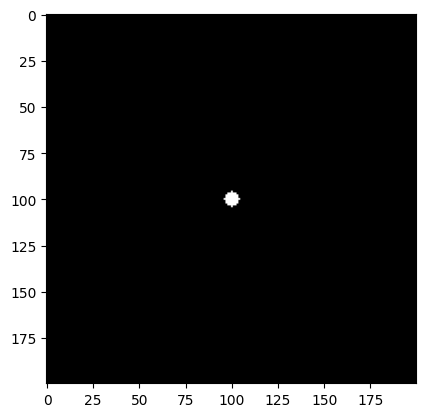

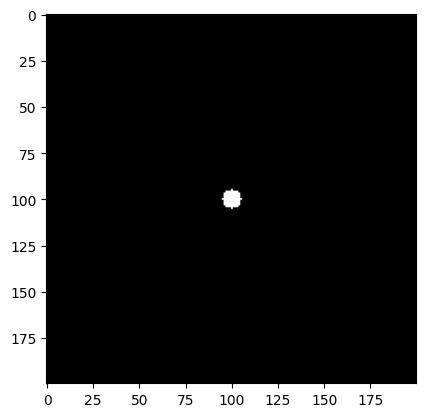

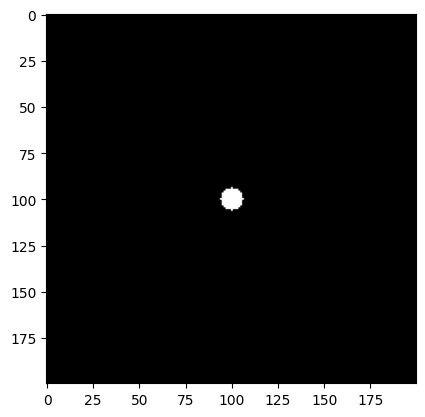

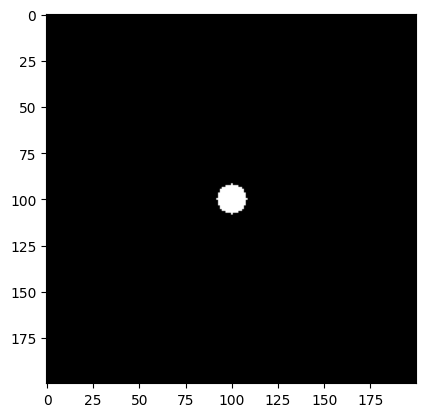

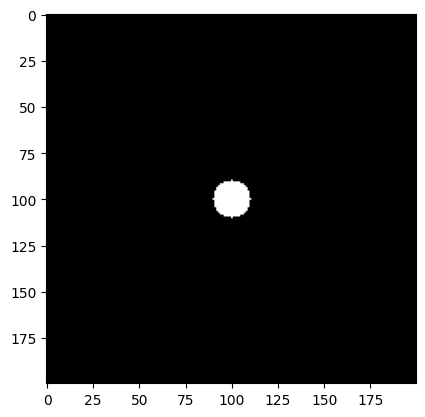

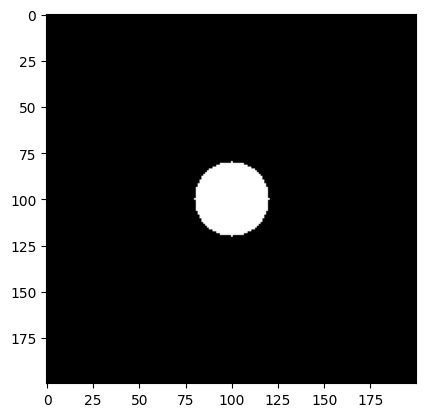

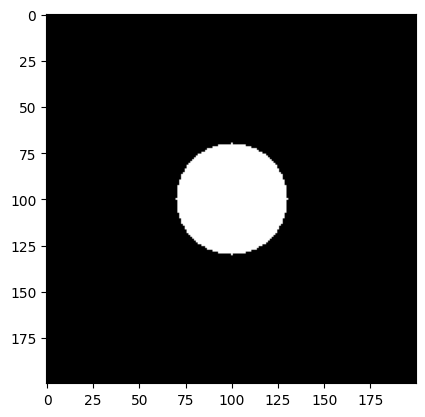

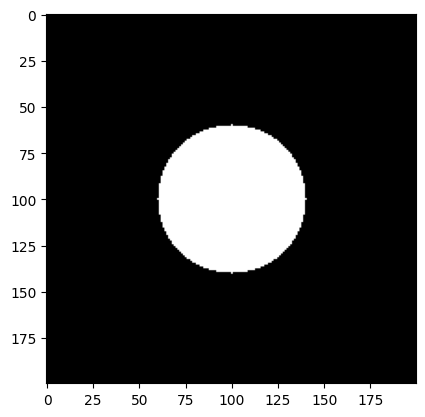

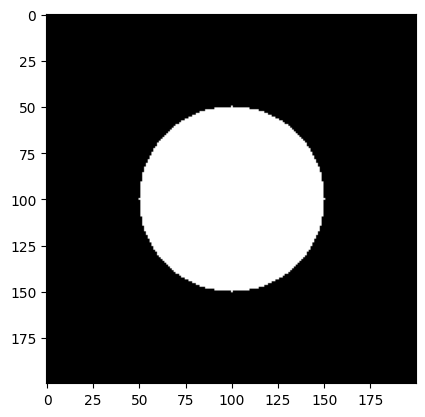

In [4]:
# Array to save data
temp_array = [[],[],[],[],[],[],[],[],[],[]]
time = []
frames_array = []
radius_array = [1,2,2.5,3,4,5,10,15,20,25] # 0.1 micrometer for dx
diameter_name_array = []
frames_name = ["0.4micro","0.8micro","1micro","1.2micro","1.6micro","2micro","4micro","6micro","8micro","10micro"]
gif_name = ["0.4micro","0.8micro","1micro","1.2micro","1.6micro","2micro","4micro","6micro","8micro","10micro"]


###.........Heat simulation diameter scan.........###
# Data
resolution = 200
startingTemperature = 103.15 # Round about -170C°
gamma = 0.245
timeStep = 1.96*10**(-4) 
boundaryTemp = 103.15
B_i = 0.18
number_of_steps = 30000

#Add heat
center= (100, 100)
value_to_add = 492.2
radius_of_interest = 2

specific_point = timeStep*number_of_steps
step_size = timeStep
time_step_array =  np.arange(0, specific_point, step_size)
time.append(time_step_array)
        

for i in range(len(radius_array)):
        
        radius_heat = radius_array[i]*2
        
        x1 = np.full(resolution, startingTemperature)
        y1 = np.full(resolution, startingTemperature)

        x2 = np.full(resolution, gamma)
        y2 = np.full(resolution, gamma)

        gridX, gridY = np.meshgrid(x1,y1)
        gridX2, gridY2 = np.meshgrid(x2,y2)

        fullGridX = np.dstack([gridX,gridX2])
        fullGridY = np.dstack([gridY,gridY2])

        # create meshgrid coordinates
        x = np.arange(resolution)
        y = np.arange(resolution)
        # create meshgrid for the x,y coordinates
        X, Y = np.meshgrid(x, y)
        # Berechne den Abstand jedes Gitterpunkts zum Mittelpunkt
        distances = np.sqrt((X - center[0])**2 + (Y - center[1])**2)
        # Überprüfe, ob der Abstand kleiner oder gleich dem Radius ist
        mask = distances <= radius_heat
        # Aktualisiere die Werte im Gitter entsprechend der Maske
        fullGridX[:,:,0][mask] += value_to_add

        # Plot the created mask
        white_image = Image.new('L', (200, 200), 255)
        white_image = white_image * mask
        plt.imshow(white_image,cmap='gray')
        plt.savefig(r'P:\Heat Transfer\Final_plots' + '/' + frames_name[i] +".pdf")
        plt.show()